In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
seed = 7
np.random.seed(seed)
filename = 'abalone.csv'
dataset = pd.read_csv(filename)
print(dataset.shape)
print(dataset.head(10))
dataset.isnull().sum()
print(dataset.dtypes)

(4177, 9)
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9 

In [3]:
encoder = LabelEncoder()
encoder.fit(dataset['Sex'])
dataset['Sex'] = encoder.transform(dataset['Sex'])

dataset['age'] = dataset['Rings'] + 1.5
dataset = dataset.drop('Rings', axis=1)
dataset.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5


In [4]:
pd.set_option('precision', 1)
print(dataset.describe())
pd.set_option('precision', 2)
print(dataset.corr(method='pearson'))

          Sex   Length  Diameter   Height  Whole weight  Shucked weight  \
count  4177.0  4.2e+03   4.2e+03  4.2e+03       4.2e+03         4.2e+03   
mean      1.1  5.2e-01   4.1e-01  1.4e-01       8.3e-01         3.6e-01   
std       0.8  1.2e-01   9.9e-02  4.2e-02       4.9e-01         2.2e-01   
min       0.0  7.5e-02   5.5e-02  0.0e+00       2.0e-03         1.0e-03   
25%       0.0  4.5e-01   3.5e-01  1.2e-01       4.4e-01         1.9e-01   
50%       1.0  5.5e-01   4.2e-01  1.4e-01       8.0e-01         3.4e-01   
75%       2.0  6.1e-01   4.8e-01  1.7e-01       1.2e+00         5.0e-01   
max       2.0  8.1e-01   6.5e-01  1.1e+00       2.8e+00         1.5e+00   

       Viscera weight  Shell weight     age  
count         4.2e+03       4.2e+03  4177.0  
mean          1.8e-01       2.4e-01    11.4  
std           1.1e-01       1.4e-01     3.2  
min           5.0e-04       1.5e-03     2.5  
25%           9.3e-02       1.3e-01     9.5  
50%           1.7e-01       2.3e-01    10.5  
75

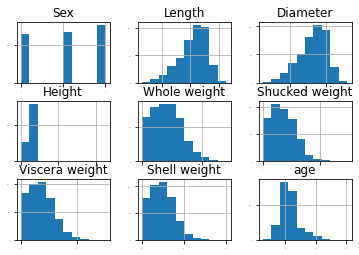

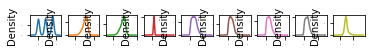

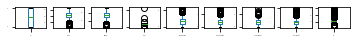

In [5]:
# Data visualization
dataset.hist(sharex = False, sharey = False, xlabelsize=1, ylabelsize=1)

# Density 
dataset.plot(kind='density', subplots=True, layout=(9,9), sharex =False, legend=False, fontsize=1)
pyplot.show()

# Box plot
dataset.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False, legend=False, fontsize=1)
pyplot.show()

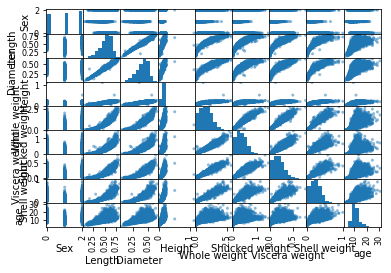

In [6]:
# Multimodal data visualizations
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

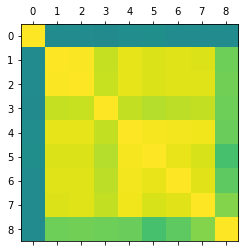

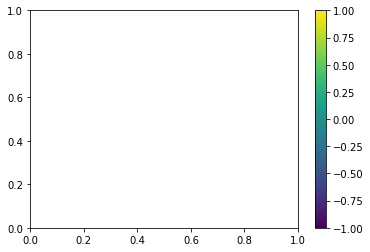

In [7]:
# correlation matrix
ax = pyplot.figure().add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
pyplot.figure().colorbar(cax)
#pyplot.show()

In [8]:
# split out validation dataset
array = dataset.values
x = array[:,0:8]
y = array[:,8]
print(dataset.head(10))
print(y)
validation_size=0.3
seed = 7
x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=validation_size,random_state=seed)

   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2    0.46      0.36    0.10          0.51            0.22   
1    2    0.35      0.27    0.09          0.23            0.10   
2    0    0.53      0.42    0.14          0.68            0.26   
3    2    0.44      0.36    0.12          0.52            0.22   
4    1    0.33      0.26    0.08          0.20            0.09   
5    1    0.42      0.30    0.10          0.35            0.14   
6    0    0.53      0.41    0.15          0.78            0.24   
7    0    0.55      0.42    0.12          0.77            0.29   
8    2    0.47      0.37    0.12          0.51            0.22   
9    0    0.55      0.44    0.15          0.89            0.31   

   Viscera weight  Shell weight   age  
0            0.10          0.15  16.5  
1            0.05          0.07   8.5  
2            0.14          0.21  10.5  
3            0.11          0.15  11.5  
4            0.04          0.06   8.5  
5            0.08          0.12  

In [9]:
# Evaluate algorithms
num_folds=10
scoring = 'neg_mean_squared_error'

In [10]:
# spot check algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [11]:
# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("{}: {}, {}".format(name, cv_results.mean(), cv_results.std()))

LR: -4.94242119410884, 0.7392494546949877
Lasso: -10.00149553838167, 1.135961360456293
EN: -9.274616268140159, 1.1133751401393874
KNN: -4.895165084856702, 0.7213960850700856
CART: -9.289169666651082, 1.3913801321258292
SVR: -5.220947685374747, 0.8167033702449845


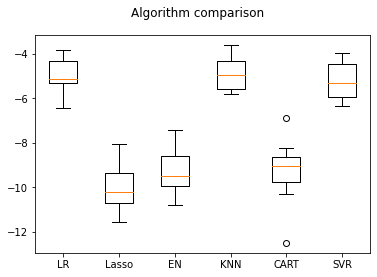

In [12]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [13]:
# Evaluate algorithms: Standardization
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()),('Lasso', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [14]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("{}: {}, {}".format(name, cv_results.mean(), cv_results.std()))

ScaledLR: -4.942421194108837, 0.739249454694978
ScaledLasso: -7.139873348320096, 0.9657871461096872
ScaledEN: -6.7410103480166015, 0.9741939500372879
ScaledKNN: -5.177499462340455, 0.5706145362473155
ScaledCART: -8.886369161718639, 1.1336349106121741
ScaledSVR: -4.6356200972317465, 0.6983733192419734
